# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [49]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [50]:
browser = Browser('chrome')

The chromedriver version (123.0.6312.122) detected in PATH at C:\Users\jmbei\AppData\Local\ChromeDriver\chromedriver.exe might not be compatible with the detected chrome version (124.0.6367.60); currently, chromedriver 124.0.6367.60 is recommended for chrome 124.*, so it is advised to delete the driver in PATH and retry


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [51]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [52]:
#************************************************************************
#** In this section I'll scrape the page and get the table holding     **
#** the data. Then, I'll extract all the rows of data from the         **
#** table. I'll iterate through the rows and extract the data elements.**
#** These elements will be saved to a list which I'll convert to a     **
#** a Pandas DataFrame.                                                **
#************************************************************************

#******************************************************
#** First, locate the table and save it as an object **
#******************************************************

mars_data_table = soup.find("table", class_="table")

In [53]:
#******************************************************
#** Second, extract all the data rows from the table **
#******************************************************

rows = mars_data_table.find_all('tr', class_="data-row")

In [54]:
#************************************************************
#** Third, create an empty list to hold the extracted data **
#************************************************************
data_list = []

In [55]:
#*********************************************
#** Fourth, iterate through the scraped data**
#** to create a list of rows.               **
#*********************************************

for row in rows:
    #extract data from each row
    cells = row.find_all('td')               #find all the cells in the row
    row_data = [cell.text for cell in cells] #extract text from each cell
    
    #create a dictionary with the data
    row_dict = {
        'id': row_data[0],                    #the identification number of a single transmission from the Curiosity rover
        'terrestrial_date': row_data[1],      #the date on earth
        'sol': row_data[2],                   #the number of elapsed sols (Martian days) since Curiosity landed on Mars
        'ls': row_data[3],                    #the solar longitude
        'month': row_data[4],                 #the Martian month
        'min_temp': row_data[5],              #the minimum temperature, in Celsius, of a single Martian day (sol)
        'pressure': row_data[6],              #The atmospheric pressure at Curiosity's location
    }
    #append the row data to the list
    data_list.append(row_dict)
        

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [56]:
#*********************************************
#** Fifth, iterate through the scraped data**
#** to create a list of rows.               **
#*********************************************
mars_df = pd.DataFrame(data_list)

In [57]:
#check the DataFrame
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [58]:
#**************************************
#** Examine data type of each column **
#**************************************

mars_df_data_types = mars_df.dtypes
print(mars_df_data_types)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [59]:
#*********************************************
#** change the data types for data analysis **
#*********************************************

new_mars_df = mars_df
new_mars_df['terrestrial_date'] = pd.to_datetime(new_mars_df['terrestrial_date'])
new_mars_df['sol'] = new_mars_df['sol'].astype(np.int64)
new_mars_df['ls'] = new_mars_df['ls'].astype(np.int64)
new_mars_df['month'] = new_mars_df['month'].astype(np.int64)
new_mars_df['min_temp'] = new_mars_df['min_temp'].astype(float)
new_mars_df['pressure'] = new_mars_df['pressure'].astype(float)




In [60]:
#************************
#** Verify the changes **
#************************
new_mars_df_data_types = new_mars_df.dtypes
print(new_mars_df_data_types)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [62]:
#*******************************
#** Examine the new DataFrame **
#*******************************

new_mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [63]:
#*********************************************************
#** Analysis section: answer the following 5 questions: **
#*********************************************************

# 1. How many months are there on Mars?
month_counts = new_mars_df['month'].value_counts()
sorted_counts = month_counts.sort_index(ascending=True)
print(sorted_counts)

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64


In [65]:
# 2. How many Martian days' worth of data are there?
num_rows=len(new_mars_df)
print(f"There are {num_rows} of Martian days' worth of data.")

There are 1867 of Martian days' worth of data.


In [66]:
# 3. What is the average low temperature by month?
average_min_temp_by_month = new_mars_df.groupby('month')['min_temp'].mean()
# Display the average minimum temperature for each unique month
print(average_min_temp_by_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


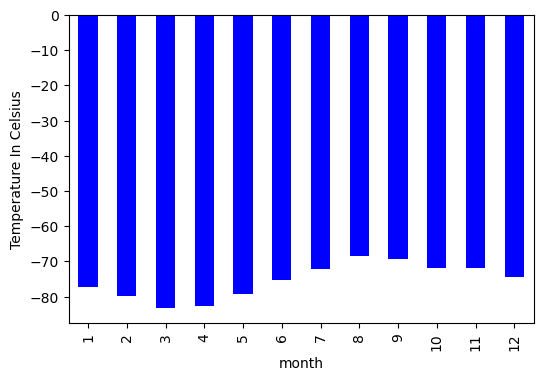

In [72]:
#*****************************************************************************
#** Make two plots: A plot of the minimum average temperature by month      **
#** and a plot of minimum average monthly temperature from least to greatest**
#*****************************************************************************

plt.figure(figsize=(6, 4))
average_min_temp_by_month.plot(kind='bar', color='blue')
plt.xlabel('month')
plt.ylabel('Temperature In Celsius')
plt.xticks(rotation=90)
plt.show()

In [102]:
# Identify the coldest and hottest months in Curiosity's location
average_min_temp_by_month = new_mars_df.groupby('month')['min_temp'].mean()
avg_temp_sorted =average_min_temp_by_month.sort_values(ascending=True)

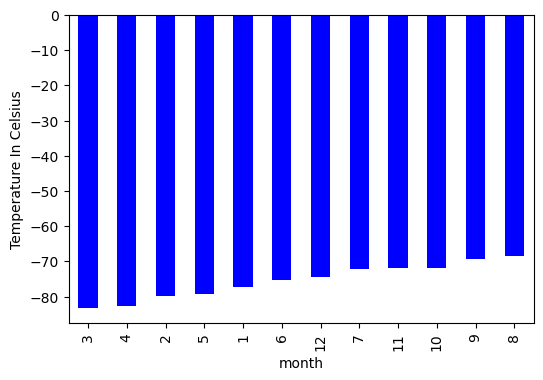

In [103]:
plt.figure(figsize=(6, 4))
avg_temp_sorted.plot(kind='bar', color='blue')
plt.xlabel('month')
plt.ylabel('Temperature In Celsius')
#plt.title('Average Minimum Temperature by Month')
#plt.xticks(rotation=90)
#plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [ ]:
#** conclusion: Month 3 is the coldest and month 8 is the hottest. Though, at -70C, "hot" is a bit disengenous...

In [104]:
# 4. Average pressure by Martian month
average_pressure_by_month = new_mars_df.groupby('month')['pressure'].mean()
# Display the average minimum temperature for each unique month
print(average_pressure_by_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


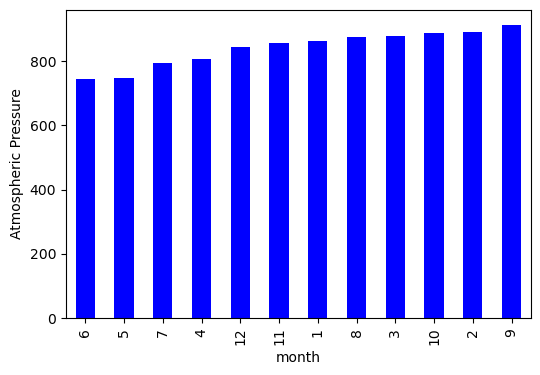

In [109]:
#plot the average pressure by month
avg_pressure_sorted =average_pressure_by_month.sort_values(ascending=True)
plt.figure(figsize=(6, 4))
avg_pressure_sorted.plot(kind='bar', color='blue')
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')
plt.xticks(rotation=90)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

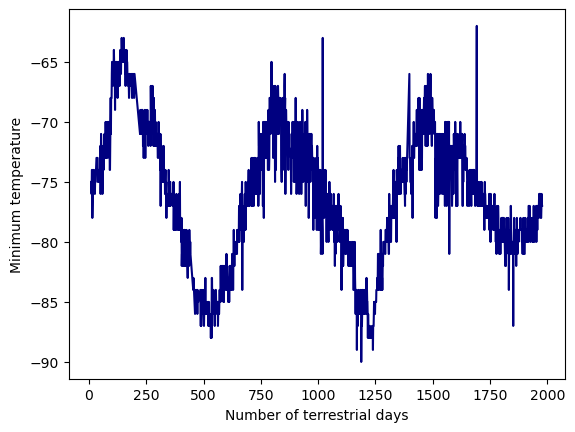

In [119]:
# 5. How many terrestrial (earth) days are there in a Martian year?
new_mars_df.plot(x='sol',y='min_temp', kind='line', color='navy',legend=False)
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature')
plt.show

In [129]:
#Conclusions:

#** 1. On average, the 3rd month has the coldest min temperature, and the 8th month is the hottest.
#** 2. On average, atmospheric pressure is lowest in month 6 and highst in month 9.
#** 3. The plot of min temperature vs. terrestrial days suggests that from peak-to-peak (e.g., 800-150) there are 650 terrestrial days. 
#**    In other words, 1 Martian year = 650 earth days. Per NASA, 1 Martian year is 687 earth days
#**    https://spaceplace.nasa.gov/years-on-other-planets/en/


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [127]:
# Write the data to a CSV
new_mars_df.to_csv("mars_data.csv",index=False)

In [128]:
browser.quit()